# OrionKL test with method 2

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np
#np.seterr(over='ignore')
import scipy as sp

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v2 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
#import aplpy
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

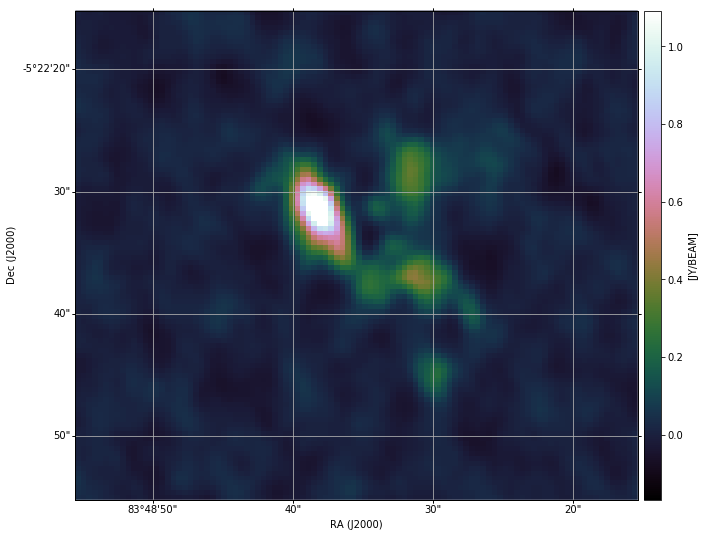

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

/users/mavillan/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


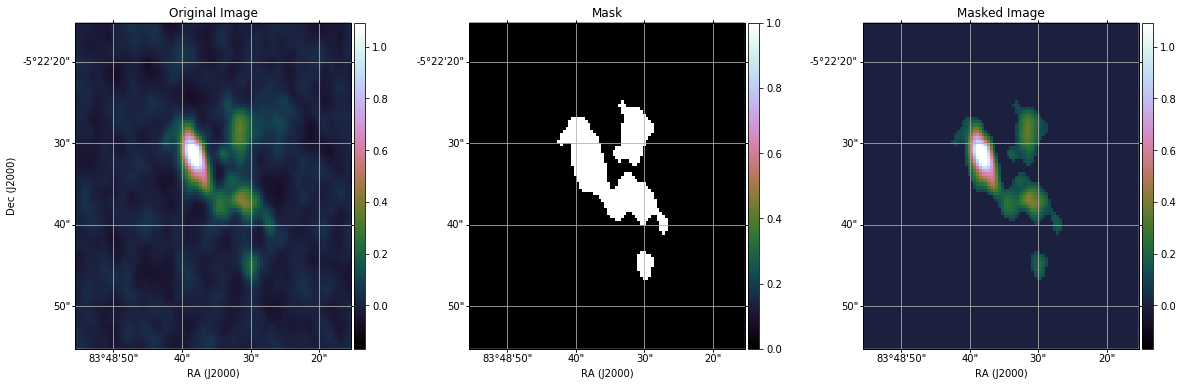

back_level:  0.10237737624469602


In [3]:
preprocessing(data, wcs)

/users/mavillan/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


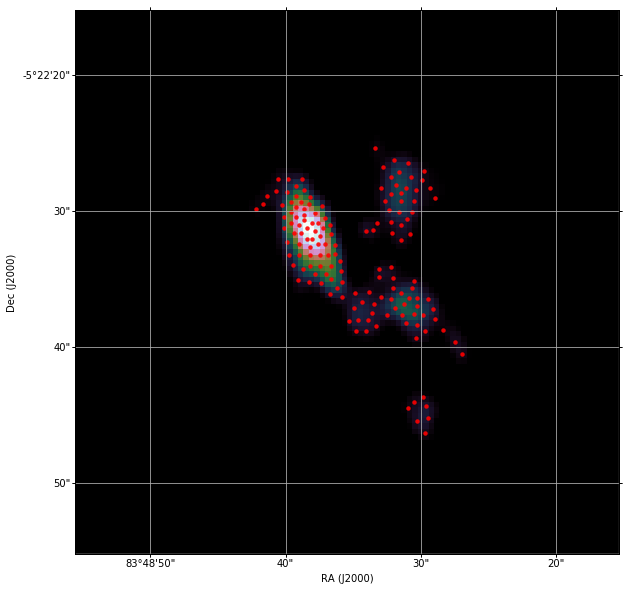

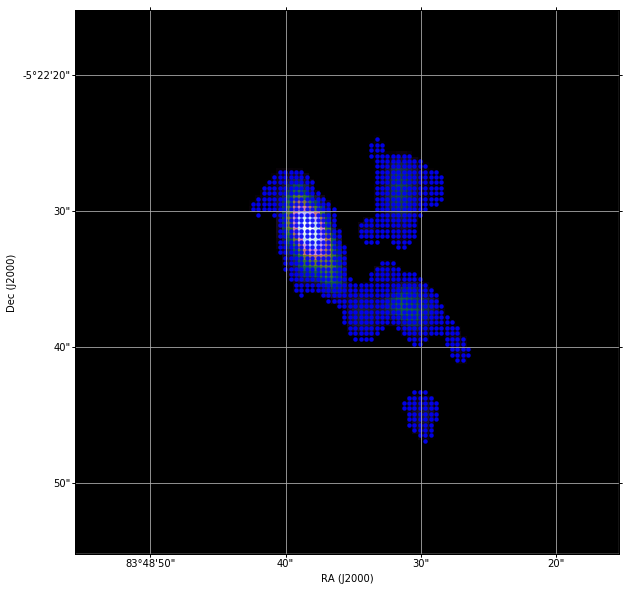

In [4]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_center=150)

In [5]:
hdmc_c = copy.deepcopy(hdmc)

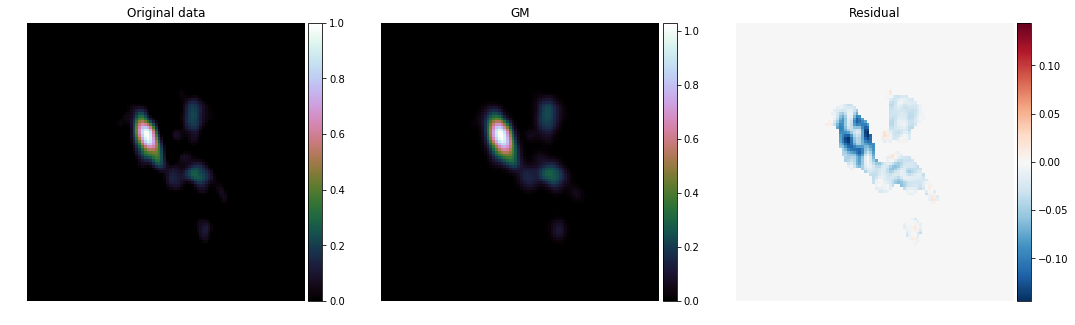

RESIDUAL STATS
RMS of residual: 0.01253695969592018
Inf norm of residual: 0.14411851204928247
Variance of residual: 0.0001509438813321946
Normalized flux addition: 0.22706574429318074
Normalized flux lost: 0.0039348691198304135


In [6]:
hdmc.get_residual_stats();

In [7]:
%%prun -s tottime -q -l 30 -T hdmc_m2_prof
hdmc.build_gmr()

 
*** Profile printout saved to text file 'hdmc_m2_prof'. 


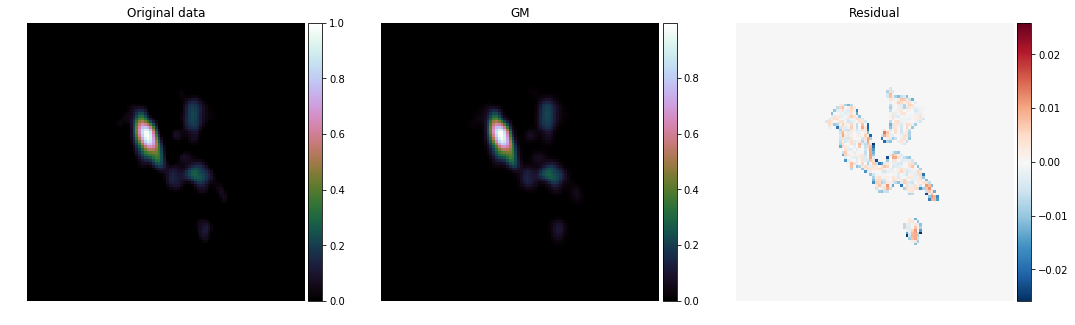

RESIDUAL STATS
RMS of residual: 0.001662851209525632
Inf norm of residual: 0.02588239029512502
Variance of residual: 2.759486594627899e-06
Normalized flux addition: 0.017951722340471512
Normalized flux lost: 0.011270208164572493


In [8]:
hdmc.get_residual_stats();

In [9]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120200.
nfev: 120224
xtol: 1e-07
ftol: 1e-07


In [10]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 156.19956421852112


In [11]:
w,sig,theta = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))
print("theta variation: ",np.max(np.abs(hdmc.theta0-theta)))

PARAMETERS VARIATION:
w variation:  0.18047578930120606
sig variation:  0.047899677527851556
theta variation:  3.141592653589793


In [12]:
w,sig,theta = hdmc.get_params_mapped()

#### Profiling results

In [13]:
print(open('hdmc_m2_prof', 'r').read())

         8781313 function calls (8779101 primitive calls) in 156.200 seconds

   Ordered by: internal time
   List reduced from 155 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   120226   96.346    0.001   96.346    0.001 {fgm_eval.gm_eval_full_thread}
        1   35.478   35.478  156.189  156.189 {built-in method scipy.optimize._minpack._lmdif}
   360678    5.758    0.000   10.865    0.000 necompiler.py:750(evaluate)
   120226    4.641    0.000    7.950    0.000 hdmclouds_v2.py:37(d1psi1)
   120226    3.267    0.000    3.267    0.000 utils.py:136(sig_mapping)
   120226    2.334    0.000  120.721    0.001 hdmclouds_v2.py:363(F)
   120226    1.589    0.000    1.589    0.000 {fgm_eval.gm_eval_full}
   360678    1.326    0.000    2.165    0.000 necompiler.py:725(getArguments)
   360681    1.175    0.000    1.562    0.000 necompiler.py:534(getContext)
   120226    0.831    0.000    0.831    0.000 utils.py:139(theta_mapping)
   7213